In [ ]:
from bs4 import BeautifulSoup
import requests 
import csv

In [ ]:
url=input("Please enter url\n")

Please enter url
https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&otracker=clp_metro_expandable_5_3.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_Q0QIS4SPJNLH_wp3&fm=neo%2Fmerchandising&iid=M_c59a68bf-abb0-414d-a5a1-c7cc6ccdb202_3.Q0QIS4SPJNLH&ppt=browse&ppn=browse&ssid=b3fqp623lc0000001638369228009


In [ ]:
file=open('flipkart2.csv','w',encoding='utf-8')
fieldnames=['name','price','rating','count_rating']

In [ ]:
#Scrapper
number_of_pages=4
product=[]
p_price=[]
rating=[]
apps = []                               
os = []                  
hd = [] 
sound = []
reviews=[]
for i in range(1,number_of_pages):
    j=str(i)
    #print(j)
    page=requests.get(url)

    soup=BeautifulSoup(page.content,'html.parser')

    content=soup.find_all('div',class_='_3pLy-c row')
    for item in content:
        item_name=item.find('div',class_='_4rR01T')
        item_price=item.find('div',class_='_30jeq3 _1_WHN1')
        item_rating=item.find('div', attrs={'class':'_3LWZlK'})
        specification = item.find('div', attrs={'class':'fMghEO'})
        #rating_reviews=item.find('span',class_='_38sUEc')
        for each in specification:
            col=each.find_all('li', attrs={'class':'rgWa7D'})
            app =col[0].text
            os_ = col[1].text
            hd_ = col[2].text
            sound_ = col[3].text
        #if item_name is not None:
        #textlist=rating_reviews.text.split()
        product.append(item_name.text) # Add product name to list
        p_price.append(item_price.text) # Add price to list
        rating.append(item_rating.text)#Add rating
        apps.append(app)# Add supported apps specifications to list
        os.append(os_) # Add operating system specifications to list
        hd.append(hd_) # Add resolution specifications to list
        sound.append(sound_) # Add sound specifications to list
        #reviews.append(textlist)
            
'''writer=csv.DictWriter(file,fieldnames=fieldnames)
writer.writeheader()
writer.writerows(item_list)
file.flush()
file.close()'''
print(len(product))
print(len(rating))
print(len(p_price))
print(len(apps))
print(len(sound))
print(len(os))
print(len(hd))

72
72
72
72
72
72
72


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.DataFrame({'Product_Name':product,'Ram_Rom':apps,'battery':sound,'display':os,"Resolution":hd,'Price':p_price,'Rating':rating})

In [ ]:
df

,Product_Name,Ram_Rom,battery,display,Resolution,Price,Rating
0,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium-ion Battery,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,"₹10,499",4.3
1,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium-ion Battery,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,"₹10,499",4.3
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium Ion Battery,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,"₹11,999",4.4
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium Ion Battery,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,"₹11,999",4.4
4,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium Ion Battery,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,"₹11,999",4.4
...,...,...,...,...,...,...,...
67,SAMSUNG Guru Music 2,NA ROM | Expandable Upto 16 GB,800 mAh Battery,5.08 cm (2 inch) QVGA Display,0MP Front Camera,"₹2,390",4.3
68,"SAMSUNG Galaxy M32 (Light Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6000 mAh Battery,16.26 cm (6.4 inch) Full HD+ Display,64MP + 8MP + 2MP + 2MP | 20MP Front Camera,"₹15,900",4.2
69,"SAMSUNG Galaxy M42 (Prism Dot Gray, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,5000 mAh Battery,16.76 cm (6.6 inch) HD+ Display,48MP + 5MP + 5MP | 20MP Front Camera,"₹20,999",4.2
70,"SAMSUNG Galaxy A12 (Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,5000 mAh Battery,16.51 cm (6.5 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,"₹11,999",4.1


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

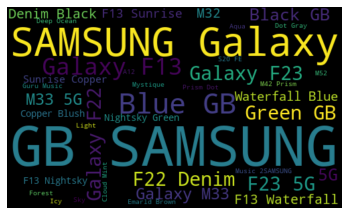

In [ ]:
#plot the word cloud
allWords = ''.join([twts for twts in df['Product_Name']])
wordCloud = WordCloud(width = 500,height =300,random_state = 21,max_font_size =119).generate(allWords)
plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def getCleanedText(text):
    text=text.lower()
    tokenizer=RegexpTokenizer(r'\w+')
    ps=PorterStemmer()
    en_stop=set(stopwords.words('english'))
    tokens=tokenizer.tokenize(text)
    new_tokens=[token for token in tokens if token not in en_stop]
    stemmed_tokens=[ps.stem(tokens) for tokens in new_tokens]
    clean_text=" ".join(stemmed_tokens)
    return clean_text

In [ ]:
import nltk
nltk.download('stopwords')
df['Price']=df['Price'].apply(getCleanedText)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df

,Product_Name,Ram_Rom,battery,display,Resolution,Price,Rating
0,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium-ion Battery,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,10 499,4.3
1,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium-ion Battery,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,10 499,4.3
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium Ion Battery,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,11 999,4.4
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium Ion Battery,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,11 999,4.4
4,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium Ion Battery,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,11 999,4.4
...,...,...,...,...,...,...,...
67,SAMSUNG Guru Music 2,NA ROM | Expandable Upto 16 GB,800 mAh Battery,5.08 cm (2 inch) QVGA Display,0MP Front Camera,2 390,4.3
68,"SAMSUNG Galaxy M32 (Light Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6000 mAh Battery,16.26 cm (6.4 inch) Full HD+ Display,64MP + 8MP + 2MP + 2MP | 20MP Front Camera,15 900,4.2
69,"SAMSUNG Galaxy M42 (Prism Dot Gray, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,5000 mAh Battery,16.76 cm (6.6 inch) HD+ Display,48MP + 5MP + 5MP | 20MP Front Camera,20 999,4.2
70,"SAMSUNG Galaxy A12 (Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,5000 mAh Battery,16.51 cm (6.5 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,11 999,4.1


In [ ]:
new_df = df[['Product_Name', 'Rating','Resolution']].copy()

In [ ]:
new_df

,Product_Name,Rating,Resolution
0,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)",4.3,48MP + 8MP + 2MP + 2MP | 13MP Front Camera
1,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",4.3,48MP + 8MP + 2MP + 2MP | 13MP Front Camera
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,50MP + 5MP + 2MP | 8MP Front Camera
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,50MP + 5MP + 2MP | 8MP Front Camera
4,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,50MP + 5MP + 2MP | 8MP Front Camera
...,...,...,...
67,SAMSUNG Guru Music 2,4.3,0MP Front Camera
68,"SAMSUNG Galaxy M32 (Light Blue, 128 GB)",4.2,64MP + 8MP + 2MP + 2MP | 20MP Front Camera
69,"SAMSUNG Galaxy M42 (Prism Dot Gray, 128 GB)",4.2,48MP + 5MP + 5MP | 20MP Front Camera
70,"SAMSUNG Galaxy A12 (Black, 64 GB)",4.1,48MP + 5MP + 2MP + 2MP | 8MP Front Camera


In [ ]:
new_df.describe()

,Product_Name,Rating,Resolution
count,72,72,72
unique,23,5,11
top,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)",4.1,50MP + 5MP + 2MP | 8MP Front Camera
freq,6,21,18


In [ ]:
new_df['Rating'].value_counts(normalize=True)

4.1    0.291667
4.4    0.250000
4.3    0.208333
4.2    0.208333
4      0.041667
Name: Rating, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))
X_cv=cv.fit_transform(df['Resolution']).toarray()
X=X_cv
y=df['Rating']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
RF=RandomForestClassifier()
RF_model=RF.fit(X_train,y_train)
print("Train Accuracy",RF_model.score(X_train,y_train))
print("Test Accuracy",RF_model.score(X_test,y_test))

Train Accuracy 0.9473684210526315
Test Accuracy 1.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

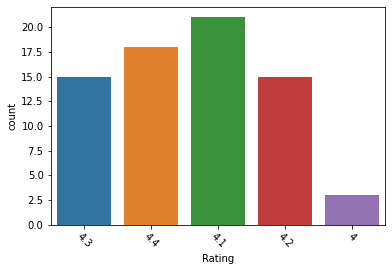

In [ ]:
sns.countplot(x='Rating', data=new_df)
plt.xticks(rotation=-45)

In [ ]:
new_df['Rating'] = pd.to_numeric(new_df['Rating'],errors='coerce')

In [ ]:
try:
    for ret in new_df['Rating']:
        if ret>4:
            pos=(new_df['Product_Name'] +'  Positive')
        elif ret<4 and ret >3.5:
            avg=(new_df['Product_Name'] +'Average')
        else:
            neg=(new_df['Product_Name'] +'Not good')
    print(pos)
    print(avg)
    print(neg)
except:
    None

0      SAMSUNG Galaxy F22 (Denim Blue, 64 GB)  Positive
1     SAMSUNG Galaxy F22 (Denim Black, 64 GB)  Positive
2     SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)  Po...
3     SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)  Po...
4     SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)  Po...
                            ...                        
67                       SAMSUNG Guru Music 2  Positive
68    SAMSUNG Galaxy M32 (Light Blue, 128 GB)  Positive
69    SAMSUNG Galaxy M42 (Prism Dot Gray, 128 GB)  P...
70          SAMSUNG Galaxy A12 (Black, 64 GB)  Positive
71    SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)  ...
Name: Product_Name, Length: 72, dtype: object
